# DotWriter

The `DotWriter` class is a helper utility in GTSAM used to customize the generation of Graphviz `.dot` file strings for visualizing factor graphs, Bayes nets, and Bayes trees.

It allows you to control aspects like figure size, whether factors are plotted as points, how edges are drawn, and specify explicit positions for variables and factors.

<a href="https://colab.research.google.com/github/borglab/gtsam/blob/develop/gtsam/inference/doc/DotWriter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install gtsam graphviz

In [ ]:
import gtsam
from gtsam import DotWriter
from gtsam import SymbolicFactorGraph # Example graph type
from gtsam import symbol_shorthand
import graphviz # For rendering
import numpy as np

X = symbol_shorthand.X
L = symbol_shorthand.L

## Creating and Configuring a DotWriter

You create a `DotWriter` object and can then modify its public member variables to change the output format.

In [ ]:
writer = DotWriter(
    figureWidthInches = 8.0,
    figureHeightInches = 5.0,
    plotFactorPoints = True,      # Draw black dots for factors
    connectKeysToFactor = True,   # Draw edges from variables to factor dots
    binaryEdges = False           # Don't simplify binary factors to single edges
)

# --- Configuration Options ---

# Specify explicit positions (used by neato -n)
writer.variablePositions = {
    X(0): gtsam.Point2(0, 0),
    X(1): gtsam.Point2(2, 0),
    X(2): gtsam.Point2(4, 0),
    L(1): gtsam.Point2(1, 2),
    L(2): gtsam.Point2(3, 2)
}

# Specify position hints (alternative, uses symbol char and index)
# writer.positionHints = {'x': 0.0, 'l': 2.0} # Puts 'x' vars at y=0, 'l' vars at y=2

# Specify which variables should be boxes
writer.boxes = {L(1), L(2)}

# Specify factor positions (less common)
# writer.factorPositions = {3: gtsam.Point2(0.5, 1.0)}

## Usage with Graph Objects

The configured `DotWriter` object is passed as an argument to the `.dot()` method of `FactorGraph`, `BayesNet`, or `BayesTree`.

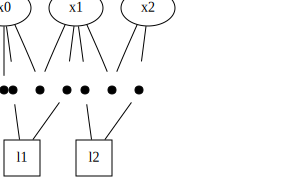

In [ ]:
# Create the same graph as in VariableIndex example
graph = SymbolicFactorGraph()
graph.push_factor(X(0))           # Factor 0
graph.push_factor(X(0), X(1))     # Factor 1
graph.push_factor(X(1), X(2))     # Factor 2
graph.push_factor(X(0), L(1))     # Factor 3
graph.push_factor(X(1), L(1))     # Factor 4
graph.push_factor(X(1), L(2))     # Factor 5
graph.push_factor(X(2), L(2))     # Factor 6

# Generate dot string using the configured writer
dot_string = graph.dot(writer=writer)
# print(dot_string)

# Render the graph
graphviz.Source(dot_string)